In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sever.data_loader import RLE

In [2]:
!ls ../data/raw/severstal-steel-defect-detection/train.csv

../data/raw/severstal-steel-defect-detection/train.csv


In [3]:
img_size = 256 * 1600
img_size

409600

In [4]:
train_csv = '../data/raw/severstal-steel-defect-detection/train.csv'
df = pd.read_csv(train_csv)
df.head()

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [5]:
df['ImageId'], df['ClassId'] = zip(*df['ImageId_ClassId'].str.split('_'))
df['ClassId'] = df['ClassId'].astype(int)
df = df.pivot(index='ImageId', columns='ClassId', values='EncodedPixels')
df.columns = [f'rle{c}' for c in range(4)]
df['defects'] = df.count(axis=1)
for c in range(4):
    df[f'c{c}'] = df[f'rle{c}'].apply(lambda rle: not pd.isnull(rle))

In [6]:
df.head()

,rle0,rle1,rle2,rle3,defects,c0,c1,c2,c3
ImageId,,,,,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1,True,False,False,False
00031f466.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False
000418bfc.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False
000789191.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1,False,False,True,False


In [7]:
counts = {c: df[f'c{c}'].sum() for c in range(4)}
counts

{0: 897, 1: 247, 2: 5150, 3: 801}

In [8]:
sorted_classes = sorted(counts.items(), key=lambda kv: kv[1])
sorted_classes

[(1, 247), (3, 801), (0, 897), (2, 5150)]

In [9]:
def assign_min_sample_class(row, sorted_classes):
    for c, _ in sorted_classes:
        if row[f'c{c}']:
            return c
    return -1

In [10]:
df['sample_class'] = df.apply(lambda row: assign_min_sample_class(row, sorted_classes), axis=1)
df.head()

,rle0,rle1,rle2,rle3,defects,c0,c1,c2,c3,sample_class
ImageId,,,,,,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1,True,False,False,False,0
00031f466.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1
000418bfc.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1
000789191.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1,False,False,True,False,2


In [11]:
def pixel_count(s):
    if not isinstance(s, str):
        return 0
    mask = RLE.from_str(s).to_mask()
    return mask.sum()

def contains_defect(s):
    return isinstance(s, str)

In [12]:
df.iloc[:, 4]

ImageId
0002cc93b.jpg    1
00031f466.jpg    0
000418bfc.jpg    0
000789191.jpg    0
0007a71bf.jpg    1
                ..
fff0295e1.jpg    0
fff02e9c5.jpg    1
fffe98443.jpg    1
ffff4eaa8.jpg    1
ffffd67df.jpg    1
Name: defects, Length: 12568, dtype: int64

In [13]:
df['c0'] = df.iloc[:, 0].apply(contains_defect)
df['c1'] = df.iloc[:, 1].apply(contains_defect)
df['c2'] = df.iloc[:, 2].apply(contains_defect)
df['c3'] = df.iloc[:, 3].apply(contains_defect)

In [14]:
df['px0'] = df.iloc[:, 0].apply(pixel_count)
df['px1'] = df.iloc[:, 1].apply(pixel_count)
df['px2'] = df.iloc[:, 2].apply(pixel_count)
df['px3'] = df.iloc[:, 3].apply(pixel_count)
df.head(25)

,rle0,rle1,rle2,rle3,defects,c0,c1,c2,c3,sample_class,px0,px1,px2,px3
ImageId,,,,,,,,,,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1,True,False,False,False,0,4396,0,0,0
00031f466.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1,0,0,0,0
000418bfc.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1,0,0,0,0
000789191.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1,0,0,0,0
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1,False,False,True,False,2,0,0,6897,0
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1,True,False,False,False,0,8319,0,0,0
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1,False,False,False,True,3,0,0,0,69357
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1,False,False,True,False,2,0,0,4851,0
001982b08.jpg,NaN,NaN,NaN,NaN,0,False,False,False,False,-1,0,0,0,0


In [15]:
df.loc[df.px0 != 0, 'px0'].quantile(0.02)

547.76

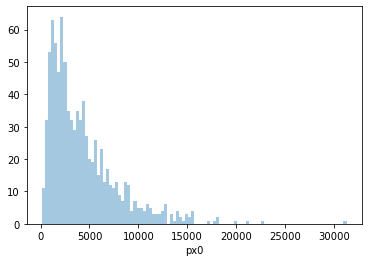

In [16]:
sns.distplot(df.loc[df.px0 != 0, 'px0'], bins=100, kde=False)

In [24]:
df.loc[df.px1 != 0, 'px1'].quantile(0.02)

715.3199999999999

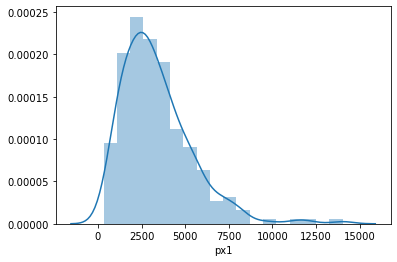

In [18]:
sns.distplot(df.loc[df.px1 != 0, 'px1'])

In [25]:
df.loc[df.px2 != 0, 'px2'].quantile(0.02)

1145.96

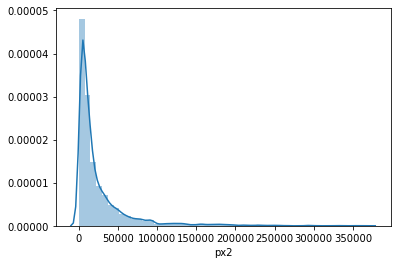

In [20]:
sns.distplot(df.loc[df.px2 != 0, 'px2'])

In [26]:
df.loc[df.px3 != 0, 'px3'].quantile(0.02)

2959.0

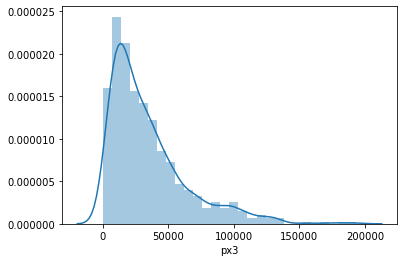

In [22]:
sns.distplot(df.loc[df.px3 != 0, 'px3'])

In [23]:
print(df.c1.mean(), df.c2.mean(), df.c3.mean(), df.c4.mean())

AttributeError: 'DataFrame' object has no attribute 'c4'

In [ ]:
df.groupby(['c1', 'c2', 'c3', 'c4'])['defects'].count()

In [ ]:
df.c3.mean()

In [ ]:
df_empty.empty

In [ ]:
df_nodef = df.loc[df.defects > 0, :]
df_nodef.shape